## 210806 회의록

- 회의 목표  :  주제 선정 

- 주제 : 코로나 접종 현황에 따른 소비 패턴 변화!
- 전제 : 월 별 접종 현황을 나누고

- 전국 코로나 접종 현황 따른 변화 
  - 소비내역 분석
  - 이동량 변화 (카드내역, 대중교통, 통신사)
  - 확산 (대구/ 여름 / 연말 )  /  제 4차 확산  (백신차이)

In [5]:
import requests
from bs4 import BeautifulSoup

import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" 

In [6]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


## 1. 백신 접종률을 api를 통해 받아오기(서울시 데이터라 폐기)

In [7]:
# KEY = "634d526578776f6f3632585548614d"
# TYPE = "json"
# SERVICE = "tvCorona19VaccinestatNew"
# START_INDEX = "1"
# END_INDEX = "5"
url = 'http://openapi.seoul.go.kr:8088/634d526578776f6f3632585548614d/json/tvCorona19VaccinestatNew/1/108/'

In [8]:
result = requests.get(url)
vaccine_info = result.json()['tvCorona19VaccinestatNew']['row']

In [9]:
first_rate = []
second_rate = []
date = []


for i in range(len(vaccine_info)-1,-1,-1):
    date.append(vaccine_info[i]['S_VC_DT'])
    first_rate.append(vaccine_info[i]['FIR_INC_RATE'])
    second_rate.append(vaccine_info[i]['SCD_INC_RATE'])
    

In [10]:
vaccine_df = pd.DataFrame({"접종일자":date, "1차접종률":first_rate,"2차접종률":second_rate})
vaccine_df['1차접종률'] = vaccine_df['1차접종률'].astype(float)
vaccine_df['2차접종률'] = vaccine_df['2차접종률'].astype(float)

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, '접종일자')

Text(0, 0.5, '접종률')

([<matplotlib.axis.XTick at 0x1ca5b175700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

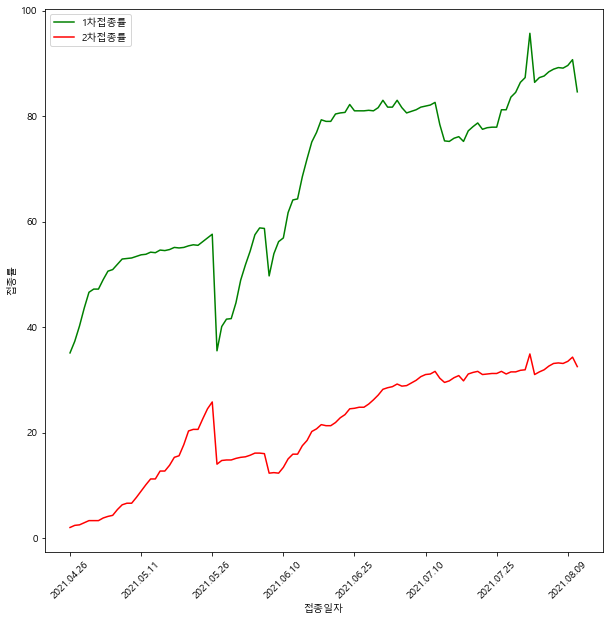

In [11]:
plt.figure(figsize=(10,10))
plt.plot(vaccine_df['접종일자'], vaccine_df['1차접종률'], color='green', label='1차접종률')
plt.plot(vaccine_df['접종일자'], vaccine_df['2차접종률'], color='red',label='2차접종률')

plt.xlabel('접종일자')
plt.ylabel('접종률')
plt.xticks([vaccine_df['접종일자'][15*i] for i in range(8)],rotation=45)

plt.legend(loc='best')

# 1. 질병관리청 통계 크롤링

In [12]:
url = "https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000"

res = requests.get(url)

In [13]:
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [53]:
a = soup.find_all('tr',{"class":'sumline_cmn_top'})
vaccinated = a[0]


first_day = vaccinated.find_all('td', {"class":'d_num'})[0].text.strip().replace(',',"")
first_sum = vaccinated.find_all('td', {"class":'d_num'})[1].text.strip().replace(',',"")
second_day = vaccinated.find_all('td', {"class":'d_num'})[2].text.strip().replace(',',"")
second_sum = vaccinated.find_all('td', {"class":'d_num'})[3].text.strip().replace(',',"")

seoul_data =[int(first_day), int(first_sum), int(second_day), int(second_sum)]

vac_df = pd.DataFrame(seoul_data,index=["당일실적_1","당일누계_1","당일실적_2","당일누계_2"],columns=['전국합계'])
vac_df


vac_df.to_csv('./Data/질병관리청통계크롤링.csv',encoding='euc-kr')

,전국합계
당일실적_1,175763
당일누계_1,21813171
당일실적_2,162616
당일누계_2,8226416
